# Pymaceuticals Inc.

### Analysis
According to the graphs: Capomulin and Ramicane have the most timepoint data, there are slightly more male mice than female mice, Capomulin and Ramicane have lower final tumor volumes compared to Infubinol and Ceftamin, Capomulin can reduce the volume of the tumor by at least 15% after 20 days, and there is a strong positive correlation between mice weight and tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results = pd.merge(study_results,mouse_metadata,left_on="Mouse ID", right_on='Mouse ID', how='left')

# Display the data table for preview
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
uniquemice = len(pd.unique(results['Mouse ID']))
uniquemice

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupli = []
for i in range(len(results)):
    check1 = results.iloc[i,0]
    check2 = results.iloc[i,1]
    for j in range(i,len(results)-1):
        if check1 == results.iloc[j+1,0] and check2 == results.iloc[j+1,1]:
            [dupli.append(results.iloc[j+1,0]) if results.iloc[j+1,0] not in dupli else dupli]
dupli

['g989']

In [4]:
# Get all the data for the duplicate mouse ID. 
duplicate = results.loc[results['Mouse ID'] == 'g989'] 
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results.drop(results.loc[results['Mouse ID'] == 'g989'].index, inplace=True)
results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
uniquemice = len(pd.unique(results['Mouse ID']))
uniquemice

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumormean = results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumormedian = results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorvariance = results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorstddev = results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorstderr = results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drugregimedf = pd.DataFrame({'Mean Tumor Volume' : tumormean,
                            'Median Tumor Volume' : tumormedian,
                            'Tumor Volume Variance' : tumorvariance,
                            'Tumor Volume Std. Dev.' : tumorstddev,
                            'Tumor Volume Std. Err.' : tumorstderr})
drugregimedf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Aggregatedrugremine = results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
Aggregatedrugremine

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

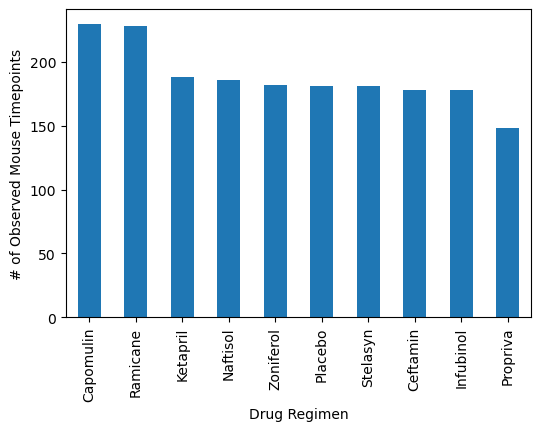

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_axis = results.groupby('Drug Regimen')['Timepoint'].count()
x_axis = x_axis.sort_values(ascending=False)

Pandasbar = x_axis.plot(kind='bar', figsize=(6,4))
Pandasbar.set_xlabel("Drug Regimen")
Pandasbar.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

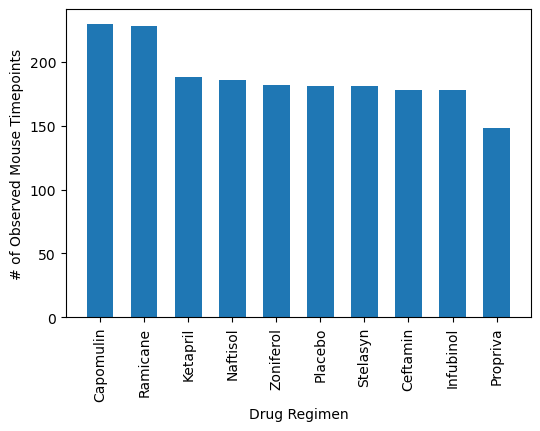

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6,4))
plt.bar(x_axis.keys(), x_axis, width = 0.6)

plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Generate data for pie plot
piedata = results.groupby('Sex')['Sex'].count()
piedata = piedata.sort_values(ascending=False)

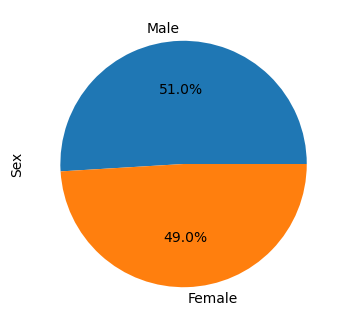

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Pandaspie = piedata.plot(kind='pie',y='male',figsize=(6,4),autopct='%1.1f%%')
plt.show()

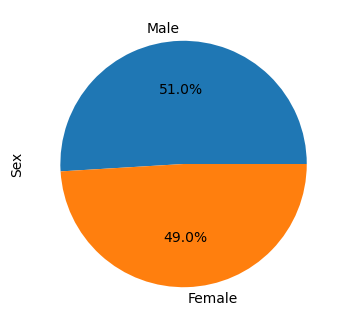

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,4))
plt.pie(piedata, labels = ['Male','Female'],autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
LastTP = results[['Mouse ID','Timepoint']]
LastTP = LastTP.groupby(['Mouse ID'])['Timepoint'].last()
LastTP_df = pd.DataFrame({'Timepoint' : LastTP})
LastTP_df = LastTP_df.reset_index()
LastTP_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [15]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
newresults = pd.merge(LastTP_df, results, how='left')
newresults

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatmentlist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumorvoldata = [[],[],[],[]]
for i in range(len(newresults)):
    if newresults.iloc[i,4] in treatmentlist:
        for j in range(len(treatmentlist)):
            if newresults.iloc[i,4] == treatmentlist[j]:
                tumorvoldata[j].append(newresults.iloc[i,2])

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset  
# Determine outliers using upper and lower bounds
tumordf = pd.DataFrame({'Capomulin' : sorted(tumorvoldata[0]),
                       'Ramicane' : sorted(tumorvoldata[1]),
                       'Infubinol' : sorted(tumorvoldata[2]),
                       'Ceftamin' : sorted(tumorvoldata[3])})

quartiles = tumordf.quantile([.25,.5,.75])

for i in range(len(quartiles.columns)):
    outliers = []
    lowerq = quartiles.iloc[0,i]
    upperq = quartiles.iloc[2,i]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    for j in range(len(tumordf)):
        if tumordf.iloc[j,i] < lower_bound or tumordf.iloc[j,i] > upper_bound:
            outliers.append(j)
            outliers.append(tumordf.iloc[j,i])
    print(f"{tumordf.columns[i]}'s IQR: {iqr}. {tumordf.columns[i]}'s potential outliers: {outliers}")
            


Capomulin's IQR: 7.781863460000004. Capomulin's potential outliers: []
Ramicane's IQR: 9.098536719999998. Ramicane's potential outliers: []
Infubinol's IQR: 11.477135160000003. Infubinol's potential outliers: [0, 36.3213458]
Ceftamin's IQR: 15.577752179999997. Ceftamin's potential outliers: []


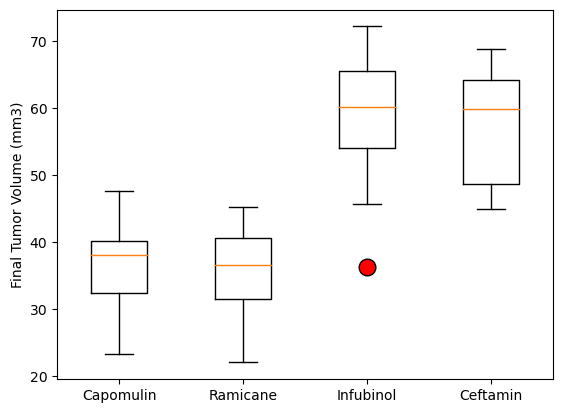

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')
ax1.boxplot(tumorvoldata,labels=treatmentlist,flierprops=flierprops)
plt.show()

In [19]:
# Generate the line plot data
Capo_linegraph = results[['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
Capo_linegraph = Capo_linegraph.loc[results['Mouse ID'] == 'l509']
Capo_linegraph 

,Mouse ID,Tumor Volume (mm3),Timepoint
231,l509,45.000000,0
253,l509,45.851193,5
539,l509,46.759074,10
881,l509,47.488599,15
982,l509,48.070452,20
1146,l509,44.006257,25
1414,l509,44.708055,30
1499,l509,40.207288,35
1723,l509,40.770813,40
1771,l509,41.483008,45


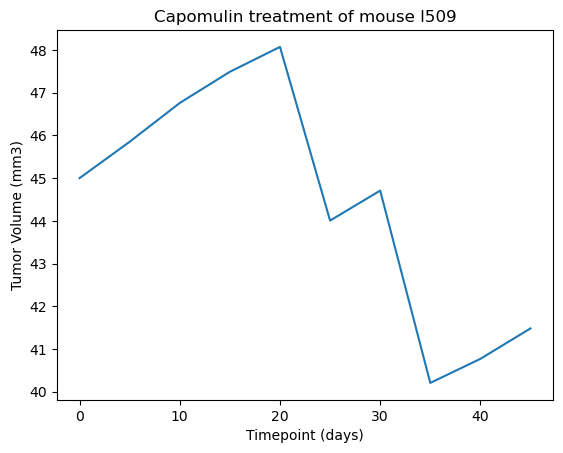

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.plot(Capo_linegraph['Timepoint'],Capo_linegraph['Tumor Volume (mm3)'])
plt.show()

In [21]:
# Generate the scatter plot data
Capo_scatter = results[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)', 'Drug Regimen']]
Capo_scatter = Capo_scatter.loc[Capo_scatter['Drug Regimen'] == 'Capomulin']
Capo_scatter

,Mouse ID,Weight (g),Tumor Volume (mm3),Drug Regimen
0,b128,22,45.000000,Capomulin
226,j246,21,45.000000,Capomulin
227,r554,17,45.000000,Capomulin
228,s185,17,45.000000,Capomulin
229,b742,21,45.000000,Capomulin
...,...,...,...,...
1854,s710,23,40.728578,Capomulin
1859,j119,23,38.125164,Capomulin
1878,i557,24,47.685963,Capomulin
1888,r944,25,41.581521,Capomulin


In [22]:
weights = Capo_scatter.groupby(['Mouse ID'])['Weight (g)'].first()
weights

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [23]:
averagetumorvolume = Capo_scatter.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
averagetumorvolume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

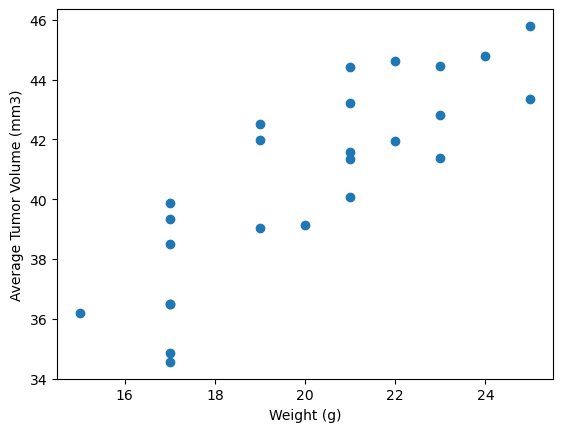

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(weights, averagetumorvolume)
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


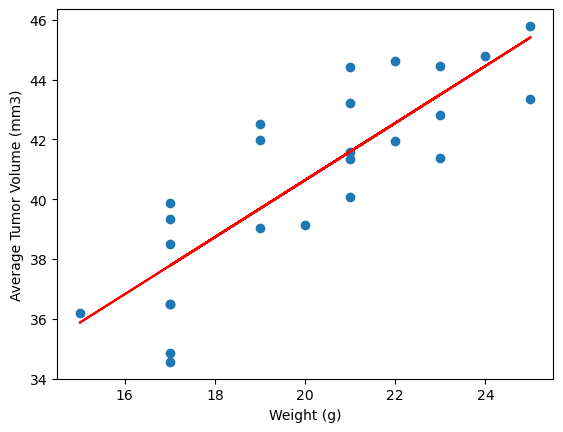

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(weights, averagetumorvolume)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, averagetumorvolume)
regress_values = weights * slope + intercept
plt.plot(weights,regress_values,"r-")

correlation = st.pearsonr(weights, averagetumorvolume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()